# Introduction

The objective of this endeavor is to construct a classifier proficient in forecasting the optimal crop for a specific plot of land, using physcial physical and chemical attributes of the terrain.

This project encompasses preliminary data inspection and thorough exploration and cleaning. It will employ advanced feature engineering techniques before progressing to the pivotal stages of model construction and subsequent evaluation.
<br><br>
**Data sources:**
Data for this undertaking are primarily drawn from <a href="https://www.kaggle.com/datasets/varshitanalluri/crop-recommendation-dataset">Kaggle</a>, specifically the `crop_recommendation.csv` dataset.



## Scoping

Creating a project scope is crucial for guiding the process and progress of any new project. Below are four sections delineating key phases to steer this project effectively:

1. [Data Inspection](#data-inspection): In this phase, the focus will be briefing ourselves with the dataset by looking at its shape, columns and head <br>

1. Data Exploration: This section will delve into understanding the dataset comprehensively. It involves generating statistical summaries for individual columns, exploring relationships between variables, and identifying patterns or trends that may inform subsequent analysis and feature engineering.<br>

1. Feature Engineering: Here, the dataset will undergo transformation to enhance its predictive power. Techniques such as creating new features, scaling or normalizing data, and dimensionality reduction may be employed to optimize model performance.<br>

1. Model Building and Evaluation: This phase entails constructing various classifiers to predict suitable crops for given land attributes. Each classifier will be evaluated rigorously using appropriate performance metrics, and their effectiveness will be compared to determine the most suitable model for deployment.


# 0. Importing Python Dependencies

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


# 1. Data Inspection

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/crop-recommendation/crop_recommendation.csv')
df.head()

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Crop
0,90,42,43,20.879744,82.002744,6.502985,202.935536,Rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,Rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,Rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,Rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,Rice


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Nitrogen     2200 non-null   int64  
 1   Phosphorus   2200 non-null   int64  
 2   Potassium    2200 non-null   int64  
 3   Temperature  2200 non-null   float64
 4   Humidity     2200 non-null   float64
 5   pH_Value     2200 non-null   float64
 6   Rainfall     2200 non-null   float64
 7   Crop         2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [ ]:
df.describe(include='all')

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Crop
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Rice
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655,NaN
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389,NaN
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267,NaN
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686,NaN
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624,NaN
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508,NaN


In [ ]:
df.columns = df.columns.str.lower()
df.columns

Index(['nitrogen', 'phosphorus', 'potassium', 'temperature', 'humidity',
       'ph_value', 'rainfall', 'crop'],
      dtype='object')

In [ ]:
print(f"The number of duplicated rows are: {df.duplicated().sum()}\n\n")
print("The number of null values in each column:\n",df.isna().sum())

The number of duplicated rows are: 0


The number of null values in each column:
 nitrogen       0
phosphorus     0
potassium      0
temperature    0
humidity       0
ph_value       0
rainfall       0
crop           0
dtype: int64


- All columns have no null values
- All categories have been properly encoded; the target columns `crop` needs label encoding
- The numerical columns are of different scales, and need standardization.
- All features need to be checked for outliers

# 2. Explaratory Data Analysis

## 2.1 Univariate Summaries

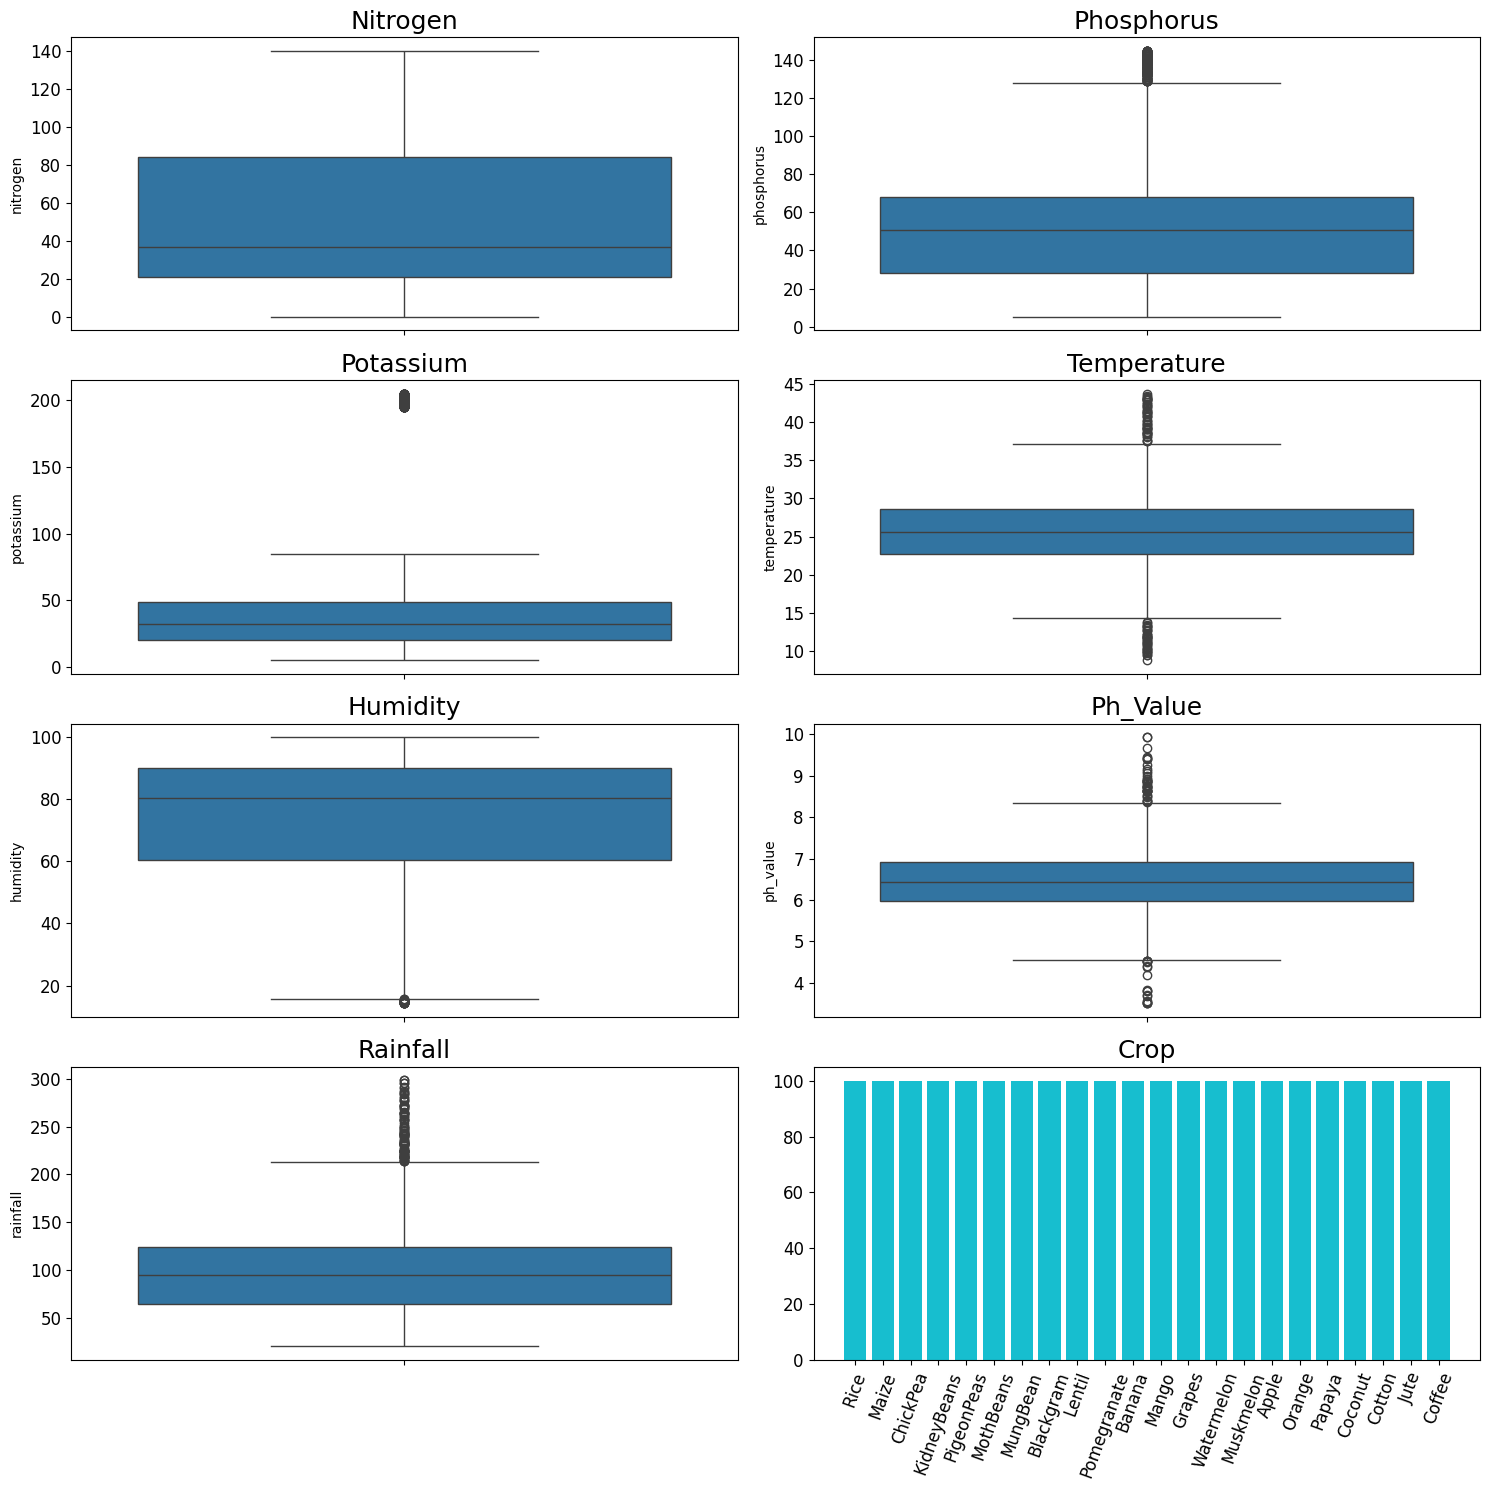

In [ ]:
axes = plt.subplots(4, 2, figsize=(15, 15), sharex=False, sharey=False)[1]
columns = df.columns
colors = plt.cm.tab10(np.linspace(0, 1, len(columns)))

# Loop over rows and columns
for i, ax_row in enumerate(axes):
    for j, ax in enumerate(ax_row):
        k = i * 2 + j
        if k < len(columns):
            col = columns[k]
            data = df[col]
            if data.dtype == 'int64' or data.dtype == 'float64':
                sns.boxplot(data, ax=ax)
            else:
                ax.bar(data.unique(), data.value_counts(), color=colors[k])
            ax.set_title(col.title(), fontsize=18)
            ax.tick_params(axis='both', labelsize=12)
            ax.tick_params(axis='x', rotation=70)
plt.tight_layout()
plt.show()

- All the feature have outliers
- The target column is balanced.

## 2.2 Multivariate Relationships

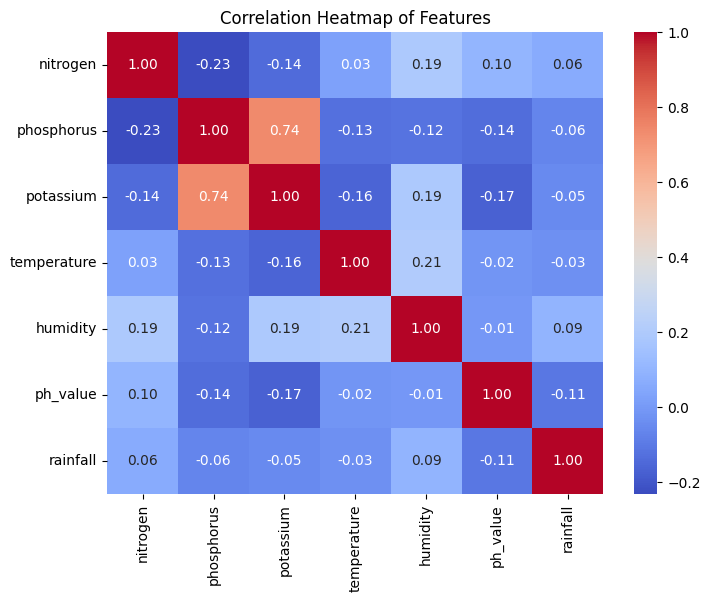

In [ ]:
df_numeric = df.drop(columns=['crop'])
plt.figure(figsize=(8, 6))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Features')
plt.show()

- Only phosphorus, and potassium are linearly related

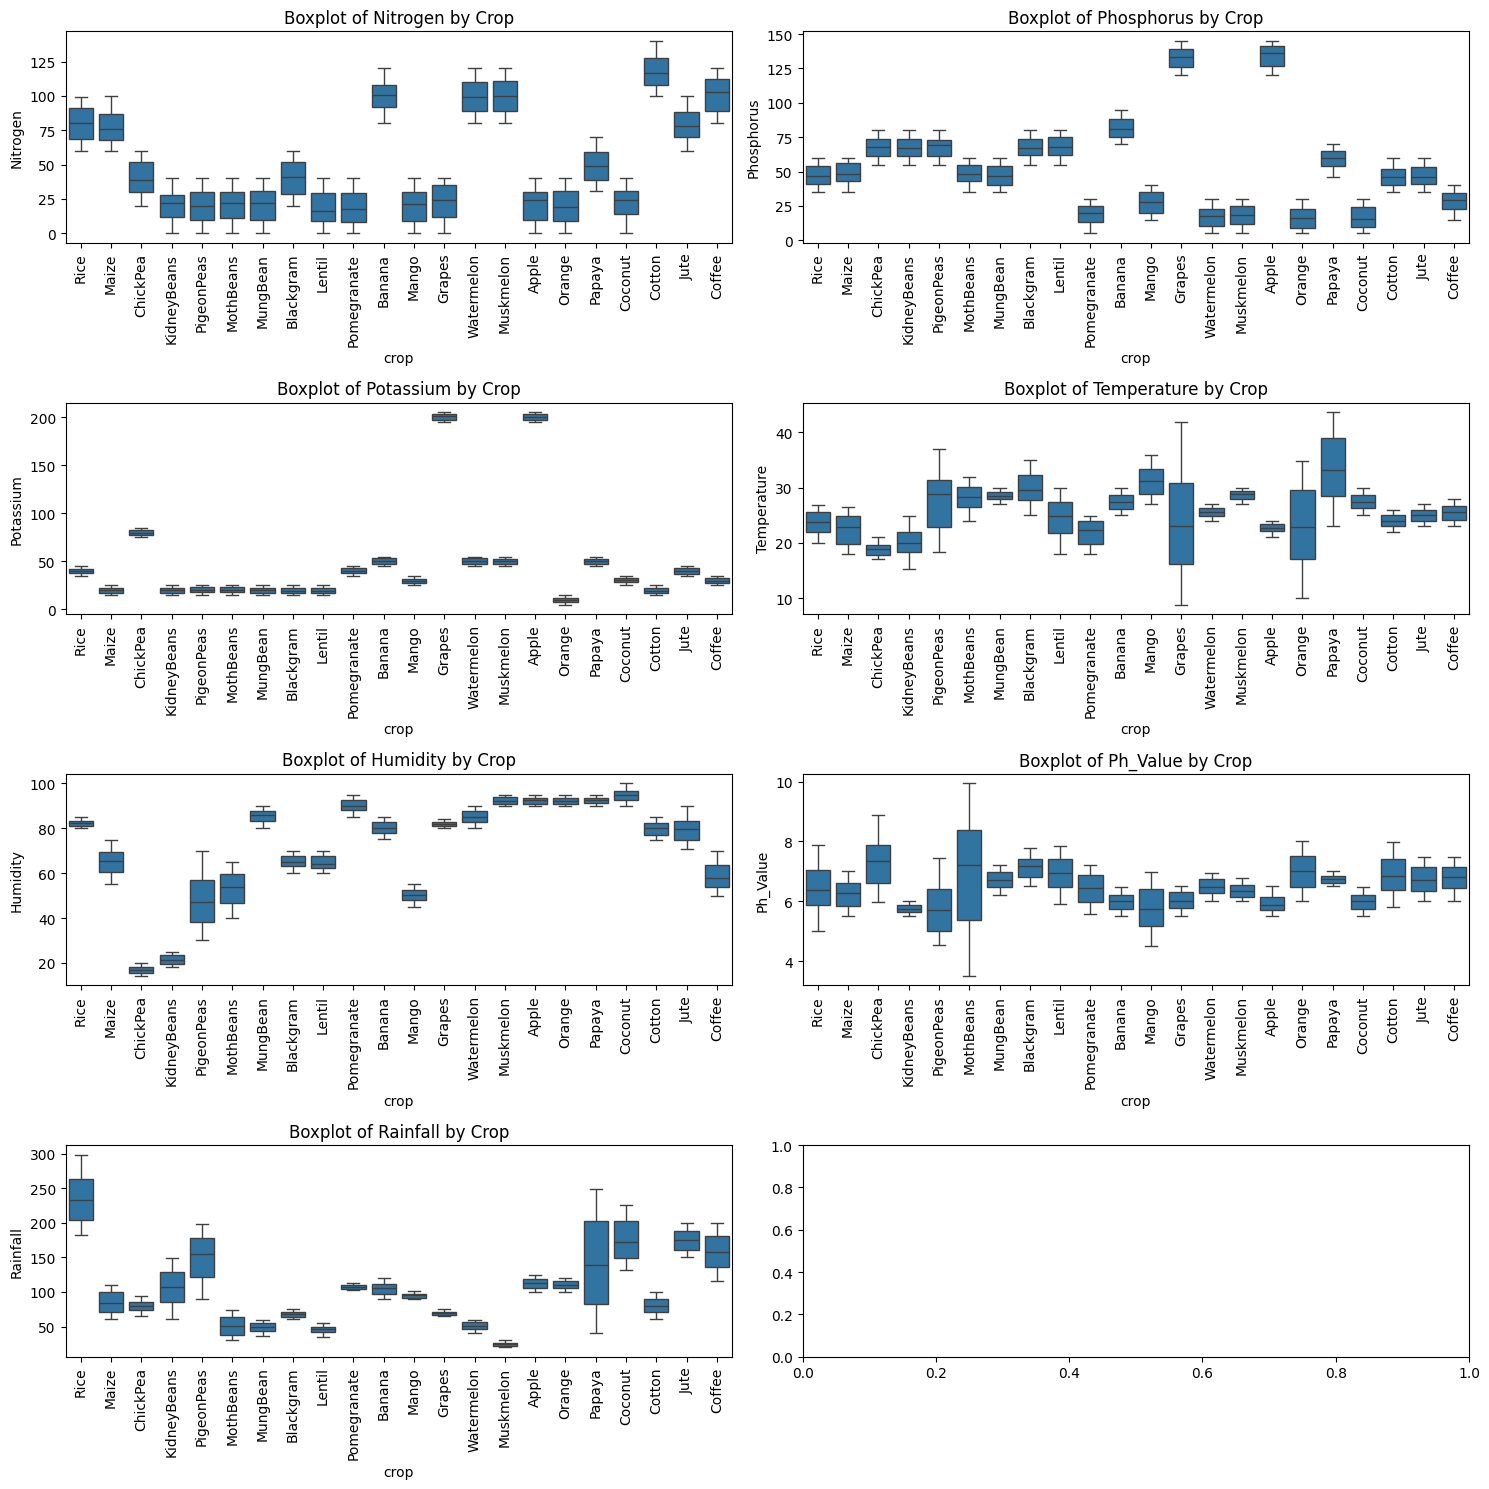

In [ ]:
features = df.columns.tolist()
features.remove('crop')

axes = plt.subplots(4, 2, figsize=(15, 15), sharex=False, sharey=False)[1]

# Iterate through each feature and create a boxplot
for i, ax_row in enumerate(axes):
    for j, ax in enumerate(ax_row):
        k = i * 2 + j

        if k < len(features):
            feature = features[k]
            data = df[feature]

            sns.boxplot(x='crop', y=feature, data=df, ax=ax)
            ax.set_title(f'Boxplot of {feature.title()} by Crop')
            ax.set_ylabel(feature.title())
            ax.tick_params(axis='x', rotation=90)
# Adjust layout
plt.tight_layout()
# Show the plots
plt.show()

- Grouping Each Feature By Crop Type Showed Diiferences in Distribution

# 3. Feature Engineering

## Removing Outliers

In [ ]:
df_filtered = df.copy()  # Make a copy of the original DataFrame
columns = df.columns[:-1]

for col in columns:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    print(f"The interquantile range of {col.title()} is {iqr}")
    low_bound = q1 - iqr * 1.5
    upper_bound = q3 + iqr * 1.5

    # Replace outliers with upper and lower bounds
    df_filtered.loc[df_filtered[col] < low_bound, col] = low_bound
    df_filtered.loc[df_filtered[col] > upper_bound, col] = upper_bound

df_filtered.describe(include='all')

The interquantile range of Nitrogen is 63.25
The interquantile range of Phosphorus is 40.0
The interquantile range of Potassium is 29.0
The interquantile range of Temperature is 5.792279300000001
The interquantile range of Humidity is 29.6868179525
The interquantile range of Ph_Value is 0.9519498220000004
The interquantile range of Rainfall is 59.715821800000015


,nitrogen,phosphorus,potassium,temperature,humidity,ph_value,rainfall,crop
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Rice
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100
mean,50.551818,52.743182,38.376364,25.588740,71.493347,6.464205,101.986465,NaN
std,36.917334,31.427156,23.460322,4.738804,22.234536,0.730288,51.165743,NaN
min,0.000000,5.000000,5.000000,14.080956,15.731726,4.543768,20.211267,NaN
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686,NaN
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624,NaN
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508,NaN


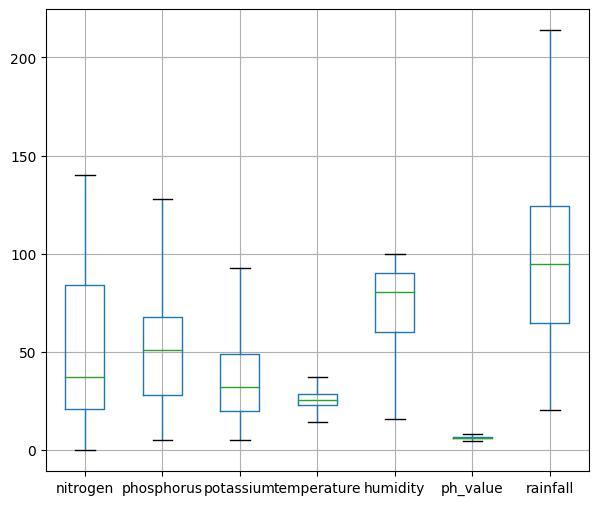

In [ ]:
plt.figure(figsize=(7, 6))
df_without_crop = df_filtered.drop(columns=['crop'])
df_without_crop.boxplot()
ax.tick_params(axis='x', rotation=90)
plt.show()

## Standardizing and Encoding

In [ ]:
df_filtered.crop.isna().sum()

0

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

X = df_filtered.drop(columns=['crop'])  # Make sure 'Crop' matches the case of the column name
y = df_filtered['crop']  # Make sure 'Crop' matches the case of the column name

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reset index of df_filtered to avoid potential index misalignment
df_filtered_reset_index = df_filtered.reset_index(drop=True)

df_scaled = pd.DataFrame(X_scaled, columns=X.columns)
df_scaled['crop'] = df_filtered_reset_index['crop']
df_scaled.head()

# create encoder
encoder = LabelEncoder()

# create new variable with assigned numbers
df_scaled['crop'] = encoder.fit_transform(df_scaled['crop'])
df_scaled.head()

,nitrogen,phosphorus,potassium,temperature,humidity,ph_value,rainfall,crop
0,1.068797,-0.341922,0.197128,-0.993936,0.472768,0.053115,1.973430,20
1,0.933329,0.167308,0.111858,-0.805930,0.397054,0.786021,2.186623,20
2,0.255986,0.071827,0.239763,-0.545469,0.487075,1.884619,2.186623,20
3,0.635298,-0.564710,0.069223,0.190462,0.389798,0.707000,2.186623,20
4,0.743673,-0.341922,0.154493,-1.152149,0.454870,1.594621,2.186623,20


In [ ]:
df_filtered.crop.value_counts()

crop
Rice           100
Maize          100
Jute           100
Cotton         100
Coconut        100
Papaya         100
Orange         100
Apple          100
Muskmelon      100
Watermelon     100
Grapes         100
Mango          100
Banana         100
Pomegranate    100
Lentil         100
Blackgram      100
MungBean       100
MothBeans      100
PigeonPeas     100
KidneyBeans    100
ChickPea       100
Coffee         100
Name: count, dtype: int64

# 4. Model Building and Evaluation

## Logistic Regression

In [ ]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from scipy.stats import uniform
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_scaled.drop(columns=['crop']), df_scaled['crop'], test_size=0.2, random_state=42, stratify = df_scaled.crop)

# Step 2: Implement Random Search
param_grid = {'C': uniform(0, 10), 'penalty': ['l2']}
random_search = RandomizedSearchCV(LogisticRegression(max_iter=1000), param_distributions=param_grid, n_iter=100, cv=5, random_state=42)
random_search.fit(X_train, y_train)

# Best parameters found by random search
best_params = random_search.best_params_
print("Best Parameters:", best_params)

# Step 3: Train Logistic Regression Model with Best Parameters
best_logreg = LogisticRegression(**best_params, max_iter=1000)
best_logreg.fit(X_train, y_train)
y_pred_log = best_logreg.predict(X_test)
# Step 4: Evaluate Model Performance
train_accuracy_log = best_logreg.score(X_train, y_train)
test_accuracy_log = best_logreg.score(X_test, y_test)
print("Training Accuracy:", train_accuracy_log)
print("Testing Accuracy:", test_accuracy_log)
print("\n Classification Report:\n" ,classification_report(y_test, y_pred_log))

Best Parameters: {'C': 9.699098521619943, 'penalty': 'l2'}
Training Accuracy: 0.9880681818181818
Testing Accuracy: 0.9886363636363636

 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        20
           2       1.00      1.00      1.00        20
           3       1.00      1.00      1.00        20
           4       1.00      1.00      1.00        20
           5       1.00      1.00      1.00        20
           6       0.95      1.00      0.98        20
           7       1.00      1.00      1.00        20
           8       0.91      1.00      0.95        20
           9       1.00      1.00      1.00        20
          10       0.95      0.95      0.95        20
          11       1.00      0.95      0.97        20
          12       1.00      1.00      1.00        20
          13       0.95      0.95      0.95        20
          14       1.00      

## K Nearest Neighbours

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Define parameter grid for KNN
param_grid_knn = {'n_neighbors': range(1, 21),
                  'weights': ['uniform', 'distance']}

# Perform RandomizedSearchCV for KNN
random_search_knn = RandomizedSearchCV(KNeighborsClassifier(), param_distributions=param_grid_knn, n_iter=50, cv=5, random_state=42)
random_search_knn.fit(X_train, y_train)

# Best parameters found by random search for KNN
best_params_knn = random_search_knn.best_params_
print("Best Parameters for KNN:", best_params_knn)

# Train KNN model with best parameters
best_knn = KNeighborsClassifier(**best_params_knn)
best_knn.fit(X_train, y_train)
y_pred_knn = best_knn.predict(X_test)

# Train accuracy for KNN
train_accuracy_knn = best_knn.score(X_train, y_train)
print("\nKNN Training Accuracy:", train_accuracy_knn)

# Test accuracy for KNN
test_accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("\nKNN Testing Accuracy:", test_accuracy_knn)
print("\n Classification Report:\n" ,classification_report(y_test, y_pred_knn))

Best Parameters for KNN: {'weights': 'distance', 'n_neighbors': 3}

KNN Training Accuracy: 1.0

KNN Testing Accuracy: 0.9818181818181818

 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        20
           2       0.91      1.00      0.95        20
           3       1.00      1.00      1.00        20
           4       1.00      1.00      1.00        20
           5       1.00      1.00      1.00        20
           6       0.95      1.00      0.98        20
           7       1.00      1.00      1.00        20
           8       0.95      1.00      0.98        20
           9       0.95      1.00      0.98        20
          10       0.95      0.90      0.92        20
          11       1.00      0.95      0.97        20
          12       0.95      1.00      0.98        20
          13       0.94      0.85      0.89        20
          14       1.00   

## 3. Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Define parameter grid for Decision Tree
param_grid_dt = {'max_depth': range(1, 21),
                 'min_samples_split': range(2, 11),
                 'min_samples_leaf': range(1, 11)}

# Perform RandomizedSearchCV for Decision Tree
random_search_dt = RandomizedSearchCV(DecisionTreeClassifier(), param_distributions=param_grid_dt, n_iter=50, cv=5, random_state=42)
random_search_dt.fit(X_train, y_train)

# Best parameters found by random search for Decision Tree
best_params_dt = random_search_dt.best_params_
print("Best Parameters for Decision Tree:", best_params_dt)

# Train Decision Tree model with best parameters
best_dt = DecisionTreeClassifier(**best_params_dt)
best_dt.fit(X_train, y_train)

# Predict on test data
y_pred_dt = best_dt.predict(X_test)

# Train accuracy for Decision Tree
train_accuracy_dt = best_dt.score(X_train, y_train)
print("\nDecision Tree Training Accuracy:", train_accuracy_dt)

# Test accuracy for Decision Tree
test_accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("\nDecision Tree Testing Accuracy:", test_accuracy_dt)
print("\n Classification Report:\n" ,classification_report(y_test, y_pred_dt))

Best Parameters for Decision Tree: {'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 20}

Decision Tree Training Accuracy: 0.9982954545454545

Decision Tree Testing Accuracy: 0.9840909090909091

 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        20
           2       1.00      0.90      0.95        20
           3       1.00      1.00      1.00        20
           4       1.00      1.00      1.00        20
           5       1.00      1.00      1.00        20
           6       1.00      1.00      1.00        20
           7       1.00      1.00      1.00        20
           8       0.95      0.95      0.95        20
           9       1.00      1.00      1.00        20
          10       0.95      0.90      0.92        20
          11       0.95      1.00      0.98        20
          12       1.00      1.00      1.00        20
          13

## Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Naive Bayes doesn't have hyperparameters to tune

# Train Naive Bayes model
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)

# Predict on test data
y_pred_nb = naive_bayes.predict(X_test)

# Train accuracy for Naive Bayes (GaussianNB doesn't have a score method)
train_accuracy_nb = naive_bayes.score(X_train, y_train)
print("\nNaive Bayes Training Accuracy:", train_accuracy_nb)

# Test accuracy for Naive Bayes
test_accuracy_nb = accuracy_score(y_test, y_pred_nb)
print("\nNaive Bayes Testing Accuracy:", test_accuracy_nb)
print("\n Classification Report:\n" ,classification_report(y_test, y_pred_nb))


Naive Bayes Training Accuracy: 0.99375

Naive Bayes Testing Accuracy: 0.9931818181818182

 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        20
           2       1.00      1.00      1.00        20
           3       1.00      1.00      1.00        20
           4       1.00      1.00      1.00        20
           5       1.00      1.00      1.00        20
           6       1.00      1.00      1.00        20
           7       1.00      1.00      1.00        20
           8       0.95      0.95      0.95        20
           9       1.00      1.00      1.00        20
          10       1.00      0.95      0.97        20
          11       1.00      1.00      1.00        20
          12       1.00      1.00      1.00        20
          13       0.95      1.00      0.98        20
          14       1.00      1.00      1.00        20
          15       

## Support Vector Machine

In [ ]:
from sklearn.svm import SVC

# Define parameter grid for SVM
param_grid_svm = {'C': uniform(0, 10),
                  'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
                  'gamma': ['scale', 'auto']}

# Perform RandomizedSearchCV for SVM
random_search_svm = RandomizedSearchCV(SVC(), param_distributions=param_grid_svm, n_iter=50, cv=5, random_state=42)
random_search_svm.fit(X_train, y_train)

# Best parameters found by random search for SVM
best_params_svm = random_search_svm.best_params_
print("Best Parameters for SVM:", best_params_svm)

# Train SVM model with best parameters
best_svm = SVC(**best_params_svm)
best_svm.fit(X_train, y_train)

y_pred_svm = best_svm.predict(X_test)

# Train accuracy for SVM
train_accuracy_svm = best_svm.score(X_train, y_train)
print("\nSVM Training Accuracy:", train_accuracy_svm)

# Test accuracy for SVM
test_accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("\nSVM Testing Accuracy :", test_accuracy_svm)
print("\n Classification Report:\n" ,classification_report(y_test, y_pred_svm))

Best Parameters for SVM: {'C': 4.56069984217036, 'gamma': 'scale', 'kernel': 'rbf'}

SVM Training Accuracy: 0.9914772727272727

SVM Testing Accuracy : 0.990909090909091

 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        20
           2       1.00      1.00      1.00        20
           3       1.00      1.00      1.00        20
           4       1.00      1.00      1.00        20
           5       1.00      1.00      1.00        20
           6       0.95      1.00      0.98        20
           7       1.00      1.00      1.00        20
           8       0.91      1.00      0.95        20
           9       1.00      1.00      1.00        20
          10       1.00      0.95      0.97        20
          11       1.00      0.95      0.97        20
          12       1.00      1.00      1.00        20
          13       0.95      1.00      0.98     

## Stacking The Models

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import StackingClassifier
rand_state = 42
level_0_estimators = dict()
level_0_estimators["logreg"] = best_logreg
level_0_estimators["knn"] = best_knn
level_0_estimators['dt'] = best_dt
level_0_estimators['nb'] = naive_bayes
# level_0_estimators['svm'] = best_svm #svm doesn't support `predict_proba`
level_0_columns = [f"{name}_prediction" for name in level_0_estimators.keys()]

level_1_estimator = RandomForestClassifier(random_state=rand_state)

kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=rand_state)
stacking_clf = StackingClassifier(estimators=list(level_0_estimators.items()),
                                    final_estimator=level_1_estimator,
                                    passthrough=True, cv=kfold, stack_method="predict_proba")
stacking_clf.fit_transform(X_train, y_train)
y_pred_stacking = stacking_clf.predict(X_test)
stacking_train_accuracy = accuracy_score(y_test, y_pred_stacking)
stacking_test_accuracy = accuracy_score(y_train, stacking_clf.predict(X_train))
print(f'Stacking Training Accuracy: {stacking_train_accuracy:.4f}')
print(f'Stacking Test     Accuracy: {stacking_test_accuracy:.4f}')

Stacking Training Accuracy: 0.9955
Stacking Test     Accuracy: 1.0000


## Comparing Models

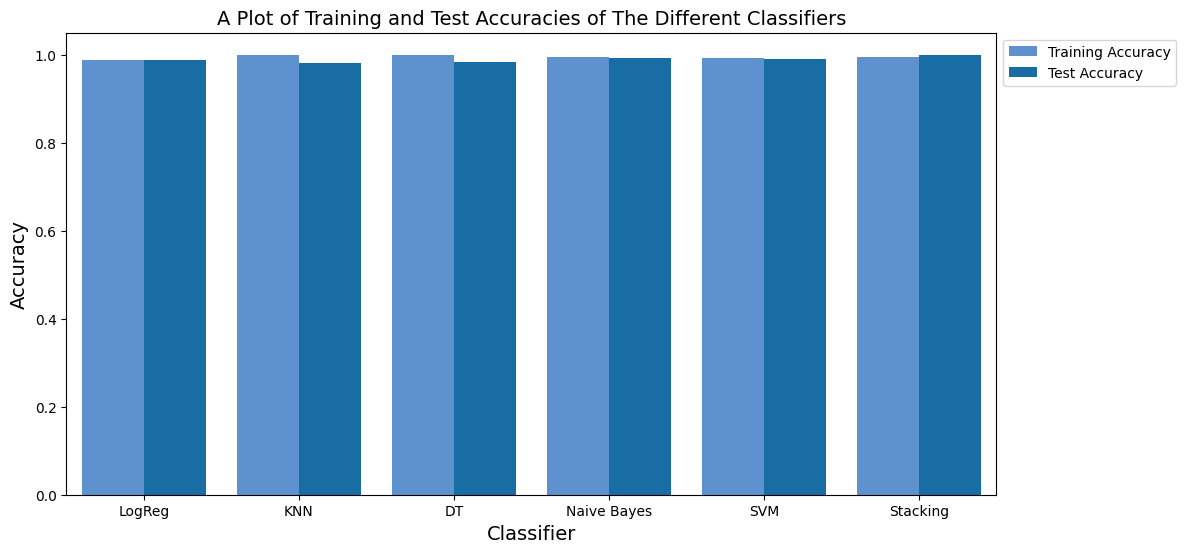

In [ ]:
categories = ['LogReg', 'KNN', 'DT', 'Naive Bayes', 'SVM', 'Stacking']
training_accuracies = [train_accuracy_log,
                       train_accuracy_knn,
                       train_accuracy_dt,
                       train_accuracy_nb,
                       train_accuracy_svm,
                       stacking_train_accuracy
                      ]  # Data for first set of bars
test_accuracies = [test_accuracy_log,
                   test_accuracy_knn,
                   test_accuracy_dt,
                   test_accuracy_nb,
                   test_accuracy_svm,
                   stacking_test_accuracy]  # Data for second set of bars

# Create a DataFrame for the data
data = {
    'Category': categories * 2,
    'Value': training_accuracies + test_accuracies,
    'Set': ['Training Accuracy'] * len(categories) + ['Test Accuracy'] * len(categories)
}
df_accuracy = pd.DataFrame(data)

# Set color palette with different shades of blue and red
colors = sns.color_palette(['#4a90e2', '#0072bb', '#00589b', '#003d6d', '#002441', '#ff4d4d', '#cc0000', '#990000', '#660000', '#330000'])

# Plot
plt.figure(figsize=(12, 6))  # Adjust size as needed
sns.barplot(x='Category', y='Value', hue='Set', data=df_accuracy, palette=colors)

plt.title('A Plot of Training and Test Accuracies of The Different Classifiers', fontsize=14)
plt.xlabel('Classifier', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Move legend outside plot

plt.show()
